"EDA" is nothing but a "Data Exploration Technique" to understand the various aspects of the data

Steps involved in "EDA":

1)Understand the data.
2)Clean the data.
3)Analysis of relationship between variables.

In [1]:
# First we need to import the required libraries.

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# load the Dataset to perform "EDA"

data = pd.read_csv("retail_sales_dataset.csv")

# UNDERSTAND THE DATA

In [3]:
# First we need to see the variables or the data persent in the uploaded data set.

data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Now we will also look the data present in the bottom of the dataset.

data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
# To check once again we can perform shape function to see the total number or rows and column in the data set.

data.shape

(1000, 9)

In [6]:
# Calculate basic statistics (mean, median, mode, standard deviation).

data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
# We can also check the columns persent in the data set.

data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
# We need to check the unique values persent in the data set.

data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

# Cleaning the Data.

In [9]:
# Data cleaning is one of the most important thing in data analytics, because there is a chance of noisy data in the dataset.

# First we need to check that whether the data contains any null values or not!

data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [10]:
# Now in our dataset, we don't need transaction ID, Date,Customer ID , so we can drop them.

data1 = data.drop(['Transaction ID','Date','Customer ID'],axis=1)

In [11]:
data1

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...
995,Male,62,Clothing,1,50,50
996,Male,52,Beauty,3,30,90
997,Female,23,Beauty,4,25,100
998,Female,36,Electronics,3,50,150


In [12]:
data1.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


In [13]:
data1.tail()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,Male,62,Clothing,1,50,50
996,Male,52,Beauty,3,30,90
997,Female,23,Beauty,4,25,100
998,Female,36,Electronics,3,50,150
999,Male,47,Electronics,4,30,120


# Relationship Analysis

In [14]:
corelation = data1.corr()

In [15]:
corelation

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


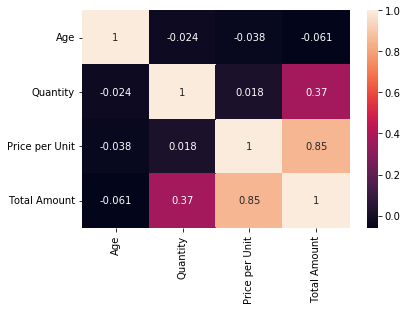

In [16]:
#HEAT MAP

sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels = corelation.columns,annot=True)

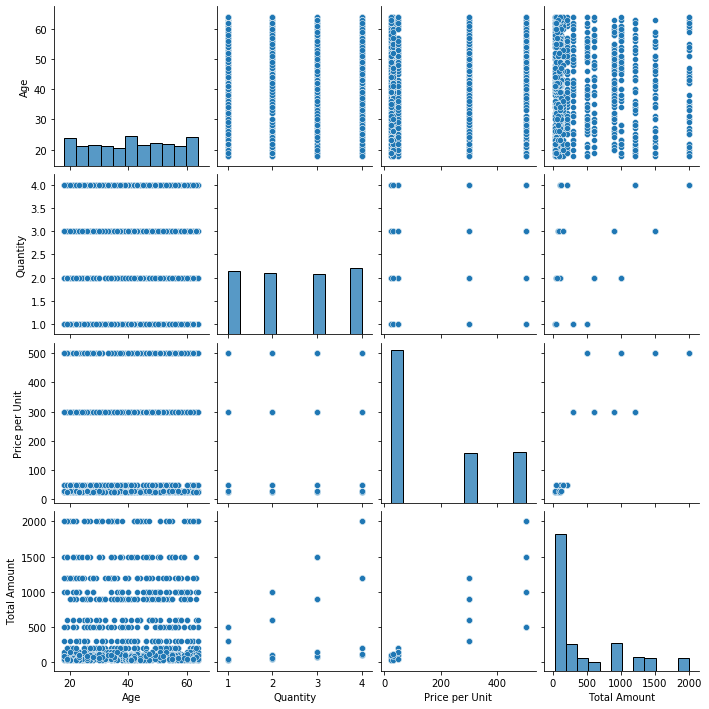

In [17]:
#PAIR PLOT

sns.pairplot(data1)

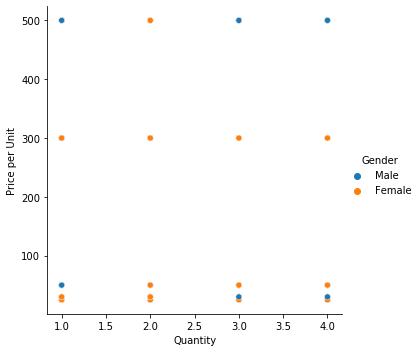

In [18]:
# Scatter plot

sns.relplot(x = 'Quantity', y ='Price per Unit',hue ='Gender',data =data1)

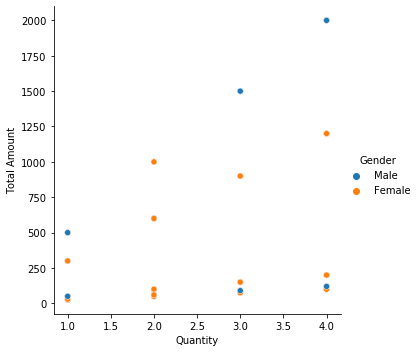

In [19]:
sns.relplot(x = 'Quantity', y ='Total Amount',hue ='Gender',data =data1)

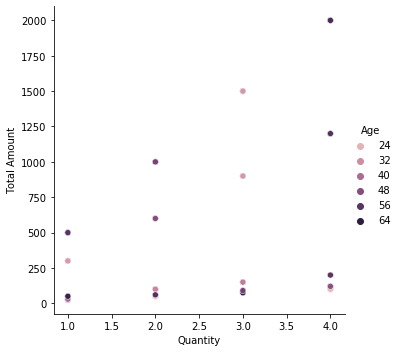

In [20]:
sns.relplot(x = 'Quantity', y ='Total Amount',hue ='Age',data =data1)

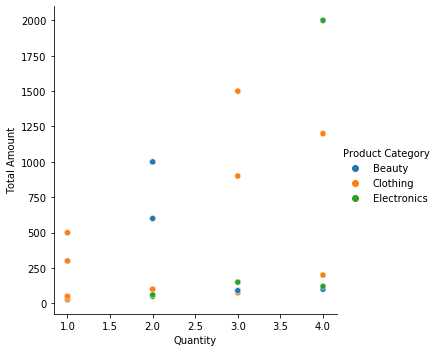

In [21]:
sns.relplot(x = 'Quantity', y ='Total Amount',hue ='Product Category',data =data1)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


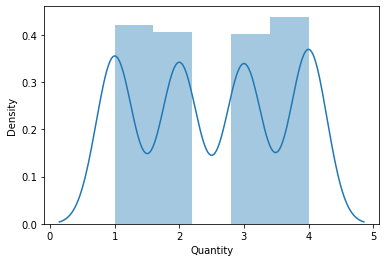

In [22]:
# Histogram

sns.distplot(data1['Quantity'],bins = 5)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


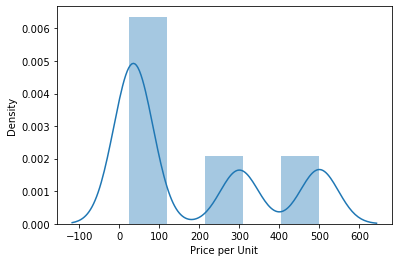

In [23]:
sns.distplot(data1['Price per Unit'],bins = 5)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


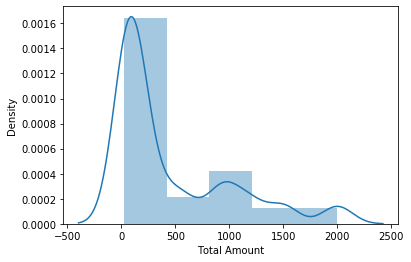

In [24]:
sns.distplot(data1['Total Amount'],bins = 5)

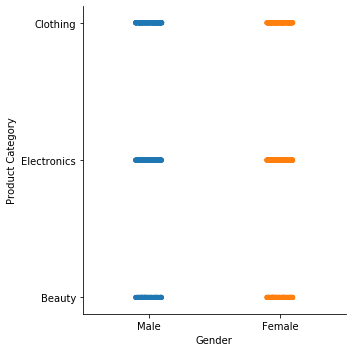

In [25]:
sns.catplot(x ='Gender',y='Product Category',data=data1)

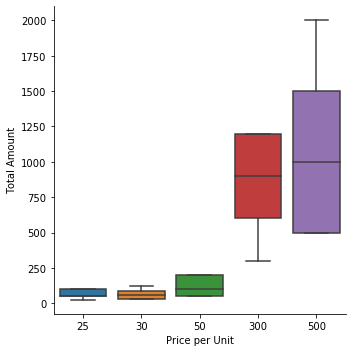

In [26]:
sns.catplot(x ='Price per Unit',y='Total Amount',kind ='box',data=data1)